# Imports, dictionary & loading datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

In [2]:
# Set display options to show numeric values without scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
plt.rcParams.update({
    'font.size': 14,          # Standard-Schriftgröße
    'axes.titlesize': 22,     # Titel-Größe
    'axes.labelsize': 18,     # Achsenbeschriftungsgröße
    'xtick.labelsize': 14,    # Beschriftungsgröße der x-Achse
    'ytick.labelsize': 14     # Beschriftungsgröße der y-Achse
})

In [4]:
ISO3166 = {
    'AD': ['Andorra', 'Andorra'],
    'AE': ['United Arab Emirates', 'Vereinigte Arabische Emirate'],
    'AF': ['Afghanistan', 'Afghanistan'],
    'AG': ['Antigua & Barbuda', 'Antigua und Barbuda'],
    'AI': ['Anguilla', 'Anguilla'],
    'AL': ['Albania', 'Albanien'],
    'AM': ['Armenia', 'Armenien'],
    'AN': ['Netherlands Antilles', 'Niederländische Antillen'],
    'AO': ['Angola', 'Angola'],
    'AQ': ['Antarctica', 'Antarktis'],
    'AR': ['Argentina', 'Argentinien'],
    'AS': ['American Samoa', 'Amerikanisch-Samoa'],
    'AT': ['Austria', 'Österreich'],
    'AU': ['Australia', 'Australien'],
    'AW': ['Aruba', 'Aruba'],
    'AZ': ['Azerbaijan', 'Aserbaidschan'],
    'BA': ['Bosnia and Herzegovina', 'Bosnien und Herzegowina'],
    'BB': ['Barbados', 'Barbados'],
    'BD': ['Bangladesh', 'Bangladesch'],
    'BE': ['Belgium', 'Belgien'],
    'BF': ['Burkina Faso', 'Burkina Faso'],
    'BG': ['Bulgaria', 'Bulgarien'],
    'BH': ['Bahrain', 'Bahrain'],
    'BI': ['Burundi', 'Burundi'],
    'BJ': ['Benin', 'Benin'],
    'BM': ['Bermuda', 'Bermuda'],
    'BN': ['Brunei Darussalam', 'Brunei'],
    'BO': ['Bolivia', 'Bolivien', 'Bolivia (Plurinational State of)'],
    'BR': ['Brazil', 'Brasilien'],
    'BS': ['Bahama', 'Bahamas'],
    'BT': ['Bhutan', 'Bhutan'],
    'BU': ['Burma (no longer exists)', 'Birma (nicht mehr existiert)'],
    'BV': ['Bouvet Island', 'Bouvetinsel'],
    'BW': ['Botswana', 'Botswana'],
    'BY': ['Belarus', 'Weißrussland'],
    'BZ': ['Belize', 'Belize'],
    'CA': ['Canada', 'Kanada'],
    'CC': ['Cocos (Keeling) Islands', 'Kokosinseln'],
    'CF': ['Central African Republic', 'Zentralafrikanische Republik'],
    'CG': ['Congo', 'Kongo','Democratic Republic of the Congo'],
    'CH': ['Switzerland', 'Schweiz'],
    'CI': ["Côte D'ivoire (Ivory Coast)", 'Elfenbeinküste', 'Ivory Coast', "Côte d'Ivoire"],
    'CK': ['Cook Iislands', 'Cookinseln'],
    'CL': ['Chile', 'Chile'],
    'CM': ['Cameroon', 'Kamerun'],
    'CN': ['China', 'China', 'China, mainland'],
    'CO': ['Colombia', 'Kolumbien'],
    'CR': ['Costa Rica', 'Costa Rica'],
    'CS': ['Serbia', 'Montenegro', 'Serbien', 'Montenegro'],
    'CU': ['Cuba', 'Kuba'],
    'CV': ['Cape Verde', 'Kap Verde'],
    'CX': ['Christmas Island', 'Weihnachtsinsel'],
    'CY': ['Cyprus', 'Zypern'],
    'CZ': ['Czech Republic', 'Czechia', 'Tschechische Republik', 'Tschechien'],
    'DD': ['German Democratic Republic (no longer exists)', 'Deutsche Demokratische Republik (nicht mehr existiert)'],
    'DE': ['Germany', 'Deutschland'],
    'DJ': ['Djibouti', 'Dschibuti'],
    'DK': ['Denmark', 'Dänemark'],
    'DM': ['Dominica', 'Dominica'],
    'DO': ['Dominican Republic', 'Dominikanische Republik'],
    'DZ': ['Algeria', 'Algerien'],
    'EC': ['Ecuador', 'Ecuador'],
    'EE': ['Estonia', 'Estland'],
    'EG': ['Egypt', 'Ägypten'],
    'EH': ['Western Sahara', 'Westsahara'],
    'ER': ['Eritrea', 'Eritrea'],
    'ES': ['Spain', 'Spanien'],
    'ET': ['Ethiopia', 'Äthiopien', 'Ethiopia PDR'],
    'FI': ['Finland', 'Finnland'],
    'FJ': ['Fiji', 'Fidschi'],
    'FK': ['Falkland Islands (Malvinas)', 'Falklandinseln (Malwinen)'],
    'FM': ['Micronesia', 'Mikronesien'],
    'FO': ['Faroe Islands', 'Färöer'],
    'FR': ['France', 'Frankreich'],
    'FX': ['France, Metropolitan', 'Frankreich, Metropolitan'],
    'GA': ['Gabon', 'Gabun'],
    'GB': ['United Kingdom', 'Vereinigtes Königreich'],
    'GD': ['Grenada', 'Grenada'],
    'GE': ['Georgia', 'Georgien'],
    'GF': ['French Guiana', 'Französisch-Guayana'],
    'GH': ['Ghana', 'Ghana'],
    'GI': ['Gibraltar', 'Gibraltar'],
    'GL': ['Greenland', 'Grönland'],
    'GM': ['Gambia', 'Gambia'],
    'GN': ['Guinea', 'Guinea'],
    'GP': ['Guadeloupe', 'Guadeloupe'],
    'GQ': ['Equatorial Guinea', 'Äquatorialguinea'],
    'GR': ['Greece', 'Griechenland'],
    'GS': ['South Georgia and the South Sandwich Islands', 'Südgeorgien und die Südlichen Sandwichinseln'],
    'GT': ['Guatemala', 'Guatemala'],
    'GU': ['Guam', 'Guam'],
    'GW': ['Guinea-Bissau', 'Guinea-Bissau'],
    'GY': ['Guyana', 'Guyana'],
    'HK': ['Hong Kong', 'Hongkong'],
    'HM': ['Heard & McDonald Islands', 'Heard- und McDonald-Inseln'],
    'HN': ['Honduras', 'Honduras'],
    'HR': ['Croatia', 'Kroatien'],
    'HT': ['Haiti', 'Haiti'],
    'HU': ['Hungary', 'Ungarn'],
    'ID': ['Indonesia', 'Indonesien'],
    'IE': ['Ireland', 'Irland'],
    'IL': ['Israel', 'Israel'],
    'IN': ['India', 'Indien'],
    'IO': ['British Indian Ocean Territory', 'Britisches Territorium im Indischen Ozean'],
    'IQ': ['Iraq', 'Irak'],
    'IR': ['Iran (Islamic Republic of)', 'Iran'],
    'IS': ['Iceland', 'Island'],
    'IT': ['Italy', 'Italien'],
    'JM': ['Jamaica', 'Jamaika'],
    'JO': ['Jordan', 'Jordanien'],
    'JP': ['Japan', 'Japan'],
    'KE': ['Kenya', 'Kenia'],
    'KG': ['Kyrgyzstan', 'Kirgisistan'],
    'KH': ['Cambodia', 'Kambodscha'],
    'KI': ['Kiribati', 'Kiribati'],
    'KM': ['Comoros', 'Komoren'],
    'KN': ['St. Kitts and Nevis', 'St. Kitts und Nevis'],
    'KP': ['North Korea', 'Nordkorea', "Democratic People's Republic of Korea"],
    'KR': ['South Korea', 'Südkorea'],
    'KW': ['Kuwait', 'Kuwait'],
    'KY': ['Cayman Islands', 'Kaimaninseln'],
    'KZ': ['Kazakhstan', 'Kasachstan'],
    'LA': ["Lao People's Democratic Republic", 'Laos'],
    'LB': ['Lebanon', 'Libanon'],
    'LC': ['Saint Lucia', 'St. Lucia'],
    'LI': ['Liechtenstein', 'Liechtenstein'],
    'LK': ['Sri Lanka', 'Sri Lanka'],
    'LR': ['Liberia', 'Liberia'],
    'LS': ['Lesotho', 'Lesotho'],
    'LT': ['Lithuania', 'Litauen'],
    'LU': ['Luxembourg', 'Luxemburg'],
    'LV': ['Latvia', 'Lettland'],
    'LY': ['Libya', 'Libyen'],
    'MA': ['Morocco', 'Marokko'],
    'MC': ['Monaco', 'Monaco'],
    'MD': ['Moldova', 'Moldawien', 'Republic of Moldova'],
    'MG': ['Madagascar', 'Madagaskar'],
    'MH': ['Marshall Islands', 'Marshallinseln'],#
    'MK': ['North Macedonia', 'Nordmazedonien'],
    'ML': ['Mali', 'Mali'],
    'MN': ['Mongolia', 'Mongolei'],
    'MM': ['Myanmar', 'Myanmar'],
    'MO': ['Macau', 'Macau'],
    'MP': ['Northern Mariana Islands', 'Nördliche Marianen'],
    'MQ': ['Martinique', 'Martinique'],
    'MR': ['Mauritania', 'Mauretanien'],
    'MS': ['Montserrat', 'Montserrat'],
    'MT': ['Malta', 'Malta'],
    'MU': ['Mauritius', 'Mauritius'],
    'MV': ['Maldives', 'Malediven'],
    'MW': ['Malawi', 'Malawi'],
    'MX': ['Mexico', 'Mexiko'],
    'MY': ['Malaysia', 'Malaysia'],
    'MZ': ['Mozambique', 'Mosambik'],
    'NA': ['Namibia', 'Namibia'],
    'NC': ['New Caledonia', 'Neukaledonien'],
    'NE': ['Niger', 'Niger'],
    'NF': ['Norfolk Island', 'Norfolkinsel'],
    'NG': ['Nigeria', 'Nigeria'],
    'NI': ['Nicaragua', 'Nicaragua'],
    'NL': ['Netherlands', 'Niederlande'],
    'NO': ['Norway', 'Norwegen'],
    'NP': ['Nepal', 'Nepal'],
    'NR': ['Nauru', 'Nauru'],
    'NT': ['Neutral Zone (no longer exists)', 'Neutralzone (existiert nicht mehr)'],
    'NU': ['Niue', 'Niue'],
    'NZ': ['New Zealand', 'Neuseeland'],
    'OM': ['Oman', 'Oman'],
    'PA': ['Panama', 'Panama'],
    'PE': ['Peru', 'Peru'],
    'PF': ['French Polynesia', 'Französisch-Polynesien'],
    'PG': ['Papua New Guinea', 'Papua-Neuguinea'],
    'PH': ['Philippines', 'Philippinen'],
    'PK': ['Pakistan', 'Pakistan'],
    'PL': ['Poland', 'Polen'],
    'PM': ['St. Pierre & Miquelon', 'St. Pierre und Miquelon'],
    'PN': ['Pitcairn', 'Pitcairn'],
    'PS': ['Palestine', 'Palestina', 'State of Palestine'],
    'PR': ['Puerto Rico', 'Puerto Rico'],
    'PT': ['Portugal', 'Portugal'],
    'PW': ['Palau', 'Palau'],
    'PY': ['Paraguay', 'Paraguay'],
    'QA': ['Qatar', 'Katar'],
    'RE': ['Réunion', 'Réunion'],
    'RO': ['Romania', 'Rumänien'],
    'RU': ['Russian Federation', 'Russische Föderation', 'Russia', 'Russland'],
    'RW': ['Rwanda', 'Ruanda'],
    'SA': ['Saudi Arabia', 'Saudi-Arabien'],
    'SB': ['Solomon Islands', 'Salomonen'],
    'SC': ['Seychelles', 'Seychellen'],
    'SD': ['Sudan', 'Sudan', 'Sudan (former)'],
    'SE': ['Sweden', 'Schweden'],
    'SG': ['Singapore', 'Singapur'],
    'SH': ['St. Helena', 'St. Helena'],
    'SI': ['Slovenia', 'Slowenien'],
    'SJ': ['Svalbard & Jan Mayen Islands', 'Svalbard und Jan Mayen'],
    'SK': ['Slovakia', 'Slowakei'],
    'SL': ['Sierra Leone', 'Sierra Leone'],
    'SM': ['San Marino', 'San Marino'],
    'SN': ['Senegal', 'Senegal'],
    'SO': ['Somalia', 'Somalia'],
    'SR': ['Suriname', 'Suriname'],
    'SS': ['South Sudan','Südsudan'],
    'ST': ['Sao Tome & Principe', 'São Tomé und Príncipe'],
    'SU': ['Union of Soviet Socialist Republics (no longer exists)', 'Sowjetunion (existiert nicht mehr)'],
    'SV': ['El Salvador', 'El Salvador'],
    'SY': ['Syrian Arab Republic', 'Syria', 'Syrien'],
    'SZ': ['Swaziland', 'Swasiland', 'Eswatini'],
    'TC': ['Turks & Caicos Islands', 'Turks- und Caicosinseln'],
    'TD': ['Chad', 'Tschad'],
    'TF': ['French Southern Territories', 'Französische Süd- und Antarktisgebiete'],
    'TG': ['Togo', 'Togo'],
    'TH': ['Thailand', 'Thailand'],
    'TJ': ['Tajikistan', 'Tadschikistan'],
    'TK': ['Tokelau', 'Tokelau'],
    'TM': ['Turkmenistan', 'Turkmenistan'],
    'TN': ['Tunisia', 'Tunesien'],
    'TO': ['Tonga', 'Tonga'],
    'TP': ['East Timor', 'Osttimor'],
    'TR': ['Turkey', 'Türkei', 'Turkiye'],
    'TT': ['Trinidad & Tobago', 'Trinidad und Tobago', 'Trinidad and Tobago'],
    'TV': ['Tuvalu', 'Tuvalu'],
    'TW': ['Taiwan, Province of China', 'Taiwan', 'China, Taiwan Province of', 'Taiwan Province of China'],
    'TZ': ['Tanzania, United Republic of', 'Tansania', 'Tanzania', 'United Republic of Tanzania'],
    'UA': ['Ukraine', 'Ukraine'],
    'UG': ['Uganda', 'Uganda'],
    'UK': ['United Kingdom', 'Vereinigtes Königreich'],
    'UM': ['United States Minor Outlying Islands', 'United States Minor Outlying Islands'],
    'US': ['United States of America', 'United States', 'Vereinigte Staaten von Amerika', 'USA'],
    'UY': ['Uruguay', 'Uruguay'],
    'UZ': ['Uzbekistan', 'Usbekistan'],
    'VA': ['Vatican City State (Holy See)', 'Holy See', 'Vatikanstadt'],
    'VC': ['St. Vincent & the Grenadines', 'St. Vincent und die Grenadinen'],
    'VE': ['Venezuela', 'Venezuela'],
    'VG': ['British Virgin Islands', 'Britische Jungferninseln'],
    'VI': ['United States Virgin Islands', 'Amerikanische Jungferninseln'],
    'VN': ['Viet Nam', 'Vietnam'],
    'VU': ['Vanuatu', 'Vanuatu'],
    'WF': ['Wallis & Futuna Islands', 'Wallis und Futuna'],
    'WS': ['Samoa', 'Samoa'],
    'XK': ['Kosovo'],
    'YE': ['Yemen', 'Jemen'],
    'YT': ['Mayotte', 'Mayotte'],
    'YU': ['Yugoslavia', 'Jugoslawien'],
    'ZA': ['South Africa', 'Südafrika'],
    'ZM': ['Zambia', 'Sambia'],
    'ZR': ['Zaire', 'Zaire'],
    'ZW': ['Zimbabwe', 'Simbabwe'],
    'ZZ': ['Unknown or unspecified country', 'Unbekanntes oder nicht spezifiziertes Land'],
}

In [5]:
# reveresed dictionary for country names for renaming
reversed_ISO3166 = {}
for code, names in ISO3166.items():
    country_name = names[0]  # Hier wird der vollständige Ländername ausgewählt
    reversed_ISO3166[country_name] = code

In [11]:
person = "wilma"
if person == "dario":

    your_path = r"C:\Users\dario\Desktop\Studium\Studium Semester XXIV (Data Science)\Visualization\Project\\"
    
else:    
    your_path = r"/home/wilma/visualization/whr_git/dario/VisualizationProj23/Data/"

df_happiness = pd.read_csv(your_path + 'World Happiness Report.csv')

df_death_causes = pd.read_csv(your_path + 'causes of death till 2019.csv', header=1)

df_internet_users = pd.read_csv(your_path + 'Internet Users percent of population.csv')

df_population = pd.read_csv(your_path + 'population.csv')

df_gdp = pd.read_csv(your_path + 'GDP DATA.csv', header=2)

df_inequality = pd.read_csv(your_path + 'Income_inequality.csv', encoding='latin1')

df_environment = pd.read_csv(your_path + 'Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding='latin1')
df_latitude_longitude = pd.read_csv(your_path + "latitude_longitude.csv", encoding='latin1')

In [12]:
# needs to be changed before pre-processing
df_latitude_longitude = df_latitude_longitude.drop(columns='country')
df_latitude_longitude.rename(columns={'name': 'country'}, inplace=True)

Liste, für dataframes, die nach country columns gecheckt und ggf encoded werden sollen. 

# Pre-Processing

## Check usability of data and set naming conventions

In [13]:
dataframes = ['df_happiness', 'df_death_causes', 'df_internet_users', 'df_population', 'df_gdp', 'df_inequality', 'df_environment', 'df_latitude_longitude']

In [14]:
# rename columns such that it is possible to use dot access

df_happiness.rename(columns={'Country Name': 'country',
                             'Life Ladder': 'happiness_score',
                             'Freedom To Make Life Choices': 'freedom',
                             'Perceptions Of Corruption': 'perception_corruption',
                             'Log GDP Per Capita': 'log_gdp',
                             'Social Support': 'social_support',
                             'Healthy Life Expectancy At Birth': 'birth_health',
                             'Regional Indicator': 'regional_indicator',
                             'Confidence In National Government': 'government_confidence',
                             'Generosity': 'generosity', 'Year': 'year'}, inplace=True)

In [15]:
# change different names for "country" to "country" to match dataframes correctly

df_with_country_column = []

for df_name in dataframes:
    df = globals()[df_name]
    column_name = None
    for col in df.columns:
        if col.lower() in ['country', 'country name', 'country/region', 'area']:
            column_name = col
            break
    if column_name is not None:
        # Make a copy of the dataframe slice to avoid SettingWithCopyWarning
        df = df[df[column_name].isin(df_happiness['country'].unique())].copy()
        df.rename(columns={column_name: 'country'}, inplace=True)
        globals()[df_name] = df
        df_with_country_column.append(df_name)

In [16]:
# Flatten the ISO3166 dictionary to handle lists in values
flattened_ISO3166 = {}
for key, value in ISO3166.items():
    if isinstance(value, list):
        for sub_value in value:
            flattened_ISO3166[sub_value.lower()] = key
    else:
        flattened_ISO3166[value.lower()] = key

# Create a set to keep track of unknown country values
unknown_countries = set()

# Iterate through the dataframes and update the 'country' column
for df_name in df_with_country_column:
    df = globals()[df_name]
    country_column = df['country']
    for index, row in df.iterrows():
        country = row.country
        
        if isinstance(country, list):
            for i, sub_country in enumerate(country):
                if sub_country.lower() in flattened_ISO3166:
                    df.loc[index, 'country'][i] = flattened_ISO3166[sub_country.lower()]
                else:
                    if sub_country not in unknown_countries:
                        print(f"Unknown country value: {sub_country}")
                        unknown_countries.add(sub_country)
        else:
            if country.lower() in flattened_ISO3166:
                df.loc[index, 'country'] = flattened_ISO3166[country.lower()]
            else:
                if country not in unknown_countries:
                    print(f"Unknown country value: {country}")
                    unknown_countries.add(country)
    globals()[df_name] = df

Unknown country value: Congo (Brazzaville)
Unknown country value: Congo (Kinshasa)
Unknown country value: Hong Kong S.A.R. of China
Unknown country value: Somaliland region


In [ ]:
# Flatten the ISO3166 dictionary to handle lists in values
flattened_reversed_ISO3166 = {}
for key, value in reversed_ISO3166.items():
    if isinstance(value, list):
        for sub_value in value:
            flattened_reversed_ISO3166[sub_value.lower()] = key
    else:
        flattened_reversed_ISO3166[value.lower()] = key

# Create a set to keep track of unknown country values
unknown_countries = set()

# Iterate through the dataframes and update the 'country' column
for df_name in df_with_country_column:
    df = globals()[df_name]
    country_column = df['country']
    for index, row in df.iterrows():
        country = row.country
        
        if isinstance(country, list):
            for i, sub_country in enumerate(country):
                if sub_country.lower() in flattened_reversed_ISO3166:
                    df.loc[index, 'country'][i] = flattened_reversed_ISO3166[sub_country.lower()]
                else:
                    if sub_country not in unknown_countries:
                        print(f"Unknown country value: {sub_country}")
                        unknown_countries.add(sub_country)
        else:
            if country.lower() in flattened_reversed_ISO3166:
                df.loc[index, 'country'] = flattened_reversed_ISO3166[country.lower()]
            else:
                if country not in unknown_countries:
                    print(f"Unknown country value: {country}")
                    unknown_countries.add(country)
    globals()[df_name] = df

Unknown country value: Congo (Brazzaville)
Unknown country value: Congo (Kinshasa)
Unknown country value: Hong Kong S.A.R. of China
Unknown country value: Somaliland region


In [ ]:
# identify the countries that exist in all the data sets

common_countries = set(df_happiness['country'].unique())

for df_name in dataframes:
    df = globals()[df_name]
    column_name = None
    for col in df.columns:
        if col.lower() == 'country' or col.lower() == 'country name':
            column_name = col
            break
    if column_name is not None:
        countries = set(df[column_name].unique())
        common_countries = common_countries.intersection(countries)

common_countries_list = ", ".join(sorted(common_countries))

print("Common Countries:", common_countries_list)
print("All countries appearing here are in all datasets.")

## Clean additional datasets

In [ ]:
# clean internet user data
df_internet_users_clean = df_internet_users.drop(['Country Code'], axis=1)
df_internet_users_clean = df_internet_users_clean.melt(id_vars=['country'], var_name='year', value_name='percent_internet_users')
df_internet_users_clean = df_internet_users_clean.groupby(['country', 'year']).mean().reset_index()
df_internet_users_clean['year'] = df_internet_users_clean['year'].astype(int)
df_internet_users_clean.head()

In [ ]:
# clean gdp data

df_gdp_clean = df_gdp.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)
df_gdp_clean = df_gdp_clean.melt(id_vars=['country'], var_name='year', value_name='gdp')
df_gdp_clean = df_gdp_clean.dropna()
df_gdp_clean['gdp'] = df_gdp_clean['gdp'].str.replace(',', '').astype(float)
df_gdp_clean = df_gdp_clean.groupby(['country', 'year']).mean().reset_index()
df_gdp_clean['year'] = df_gdp_clean['year'].astype(int)
df_gdp_clean.head()

In [ ]:
# country location will be integrated into the population dataframe
df_latitude_longitude.head()

In [ ]:
# clean population data

specified_columns = ['2022 Population', '2020 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population', '1980 Population', '1970 Population']
df_population.rename(columns=lambda x: x.split()[0] if x in specified_columns else x, inplace=True)

df_population_clean = df_population[['country', '2022', '2020', '2015', '2010', '2000', 'Area (km²)']]

df_population_clean = df_population_clean.melt(id_vars=['country', 'Area (km²)'], var_name='year', value_name='population')
df_population_clean['year'] = df_population_clean['year'].astype(int)
df_population_clean['population density'] = df_population_clean['population'] / df_population_clean['Area (km²)']

# Sort the dataframe by 'country' and 'year' columns in ascending order
df_population_clean = df_population_clean.sort_values(by=['country', 'year'], ascending=[True, True])

# join latitude and longitude data
df_population_clean = df_population_clean.merge(df_latitude_longitude, on='country', how='inner')
df_population_clean = df_population_clean.reset_index(drop=True)

df_population_clean.head()

In [ ]:
# clean inequality data

df_inequality_clean = df_inequality[['country', 'year', 'gini_reported']]

# Duplikate entfernen
df_inequality_clean = df_inequality_clean.drop_duplicates(subset=['country', 'year'])
df_inequality_clean = df_inequality_clean.reset_index(drop=True)

df_inequality_clean.head()

In [ ]:
# clean death causes data

df_death_causes_clean = df_death_causes.rename(columns={'Year': 'year', 'Both sexes': 'Probability (%) of dying between age 30 and exact age 70 from illness (all)', 'Male': 'Probability (%) of dying between age 30 and exact age 70 from illness (male)', 'Female': 'Probability (%) of dying between age 30 and exact age 70 from illness (female)', 
                                                        'Both sexes.1': 'Suicides per 100000 (all)', 'Male.1': 'Suicides per 100000 (male)', 'Female.1': 'Suicides per 100000 (female)'})

for column in df_death_causes_clean.columns[2:]:
    df_death_causes_clean[column] = df_death_causes_clean[column].str.split('[').str[0].str.strip()
    
# Sort the dataframe by 'country' and 'year' columns in ascending order
df_death_causes_clean = df_death_causes_clean.sort_values(by=['country', 'year'], ascending=[True, True])
df_death_causes_clean = df_death_causes_clean.reset_index(drop=True)

# Convert objects to float
df_death_causes_clean['Probability (%) of dying between age 30 and exact age 70 from illness (all)'] = df_death_causes_clean['Probability (%) of dying between age 30 and exact age 70 from illness (all)'].astype(float)
df_death_causes_clean['Probability (%) of dying between age 30 and exact age 70 from illness (male)'] = df_death_causes_clean['Probability (%) of dying between age 30 and exact age 70 from illness (male)'].astype(float)
df_death_causes_clean['Probability (%) of dying between age 30 and exact age 70 from illness (female)'] = df_death_causes_clean['Probability (%) of dying between age 30 and exact age 70 from illness (female)'].astype(float)
df_death_causes_clean['Suicides per 100000 (all)'] = df_death_causes_clean['Suicides per 100000 (all)'].astype(float)
df_death_causes_clean['Suicides per 100000 (male)'] = df_death_causes_clean['Suicides per 100000 (male)'].astype(float)
df_death_causes_clean['Suicides per 100000 (female)'] = df_death_causes_clean['Suicides per 100000 (female)'].astype(float)
    
df_death_causes_clean.head()

In [ ]:
# clean environmental data
df_environment_clean = df_environment[df_environment['Element'] == "Temperature change"]
df_environment_clean = df_environment_clean.drop(['Area Code', 'Months Code', 'Element Code', 'Element', 'Unit'], axis=1)
df_environment_clean = df_environment_clean.rename(columns=lambda x: x.replace('Y', ''))
df_environment_clean.rename(columns={'Area': 'country'}, inplace=True)
df_with_country_column.append('df_environment_clean')
df_environment_clean.head()

# Transpose the columns int rows using melt
df_environment_clean = df_environment_clean.melt(id_vars=['country', 'Months'], var_name='year', value_name='temperature_change')

# Rearrange the columns in the desired order'
df_environment_clean = df_environment_clean[['country', 'Months', 'year', 'temperature_change']]

# Group by country and year, calculate mean, and drop Months column
df_environment_clean = df_environment_clean.drop(['Months'], axis=1)
df_environment_clean = df_environment_clean.groupby(['country', 'year']).mean().reset_index()
df_environment_clean['year'] = df_environment_clean['year'].astype(int)

df_environment_clean.head()

# Combine data frames

In [21]:
dataframes = [df_happiness, df_death_causes_clean, df_internet_users_clean, df_population_clean, df_gdp_clean, df_inequality_clean, df_environment_clean]

In [22]:
# set equal timeframe for dataframes based on the time frame of df_happiness

# filter years from 2005 to 2022
filtered_dataframes = []
for df in dataframes:
    filtered_df = df[(df['year'] >= 2005) & (df['year'] <= 2022)]
    filtered_dataframes.append(filtered_df)

# reset index
for idx, df in enumerate(filtered_dataframes):
    filtered_dataframes[idx] = df.reset_index(drop=True)

df_happiness, df_death_causes_clean, df_internet_users_clean, df_population_clean, df_gdp_clean, df_inequality_clean, df_environment_clean = filtered_dataframes

In [23]:
def print_row_counts(dataframes):
    for idx, df in enumerate(dataframes):
        print(f"DataFrame {idx + 1} hat {len(df)} Zeilen.")

print_row_counts(dataframes)

DataFrame 1 hat 2199 Zeilen.
DataFrame 2 hat 2880 Zeilen.
DataFrame 3 hat 4672 Zeilen.
DataFrame 4 hat 765 Zeilen.
DataFrame 5 hat 7565 Zeilen.
DataFrame 6 hat 3209 Zeilen.
DataFrame 7 hat 8496 Zeilen.


In [24]:
dataframes = [df_death_causes_clean, df_internet_users_clean, df_population_clean, df_gdp_clean, df_inequality_clean, df_environment_clean]

new_dataframes = []

new_names = ['df_death_causes_combined', 'df_internet_users_combined', 'df_population_combined', 'df_gdp_combined', 'df_inequality_combined', 'df_environment_combined']

for df, new_name in zip(dataframes, new_names):
    new_df = pd.merge(df, df_happiness[['year', 'country', 'happiness_score']], on=["year", "country"], how="inner")
    new_dataframes.append(new_df)
    globals()[new_name] = new_df

In [25]:
df_death_causes_combined.head(3)

,country,year,Probability (%) of dying between age 30 and exact age 70 from illness (all),Probability (%) of dying between age 30 and exact age 70 from illness (male),Probability (%) of dying between age 30 and exact age 70 from illness (female),Suicides per 100000 (all),Suicides per 100000 (male),Suicides per 100000 (female),happiness_score
0,Afghanistan,2008,39.40,40.00,38.90,4.60,5.10,4.20,3.72
1,Afghanistan,2009,38.40,39.10,37.80,4.40,4.80,4.00,4.40
2,Afghanistan,2010,37.80,38.30,37.40,4.30,4.60,3.90,4.76


In [26]:
df_internet_users_combined.head(3)

,country,year,percent_internet_users,happiness_score
0,Afghanistan,2008,1.84,3.72
1,Afghanistan,2009,3.55,4.40
2,Afghanistan,2010,4.00,4.76


In [27]:
df_population_combined.head(3)

,country,Area (km²),year,population,population density,latitude,longitude,happiness_score
0,Afghanistan,652230,2010,28189672,43.22,33.94,67.71,4.76
1,Afghanistan,652230,2015,33753499,51.75,33.94,67.71,3.98
2,Afghanistan,652230,2022,41128771,63.06,33.94,67.71,1.28


In [28]:
# merge population to calculate gdp per person
df_gdp_combined = df_gdp_combined.merge(df_population_combined[['country', 'year', 'population']], on=['country', 'year'], how='inner')
df_gdp_combined['GDP_per_person'] = round(df_gdp_combined['gdp'] / df_gdp_combined['population'],0)

df_gdp_combined.head(3)

,country,year,gdp,happiness_score,population,GDP_per_person
0,Afghanistan,2010,15856678596.00,4.76,28189672,562.00
1,Afghanistan,2015,19134211764.00,3.98,33753499,567.00
2,Albania,2010,11926922829.00,5.27,2913399,4094.00


In [29]:
df_inequality_combined.head(31)

,country,year,gini_reported,happiness_score
0,Afghanistan,2008,29.00,3.72
1,Afghanistan,2012,33.00,3.78
2,Afghanistan,2017,31.00,2.66
3,Albania,2012,28.96,5.51
4,Algeria,2012,27.62,5.60
5,Argentina,2006,46.51,6.31
6,Argentina,2007,46.14,6.07
7,Argentina,2008,44.40,5.96
8,Argentina,2009,43.81,6.42
9,Argentina,2010,42.91,6.44


In [30]:
df_environment_combined.head(3)

,country,year,temperature_change,happiness_score
0,Afghanistan,2008,0.76,3.72
1,Afghanistan,2009,0.85,4.40
2,Afghanistan,2010,1.50,4.76


In [31]:
all_dataframes_combined = df_death_causes_combined

for df in new_dataframes[1:]:
    all_dataframes_combined = pd.merge(all_dataframes_combined, df, on=["country", "year", "happiness_score"], how= "inner")
    
all_dataframes_combined.dropna(inplace=True)
all_dataframes_combined = all_dataframes_combined.reset_index(drop=True)

all_dataframes_combined.head()

,country,year,Probability (%) of dying between age 30 and exact age 70 from illness (all),Probability (%) of dying between age 30 and exact age 70 from illness (male),Probability (%) of dying between age 30 and exact age 70 from illness (female),Suicides per 100000 (all),Suicides per 100000 (male),Suicides per 100000 (female),happiness_score,percent_internet_users,Area (km²),population,population density,latitude,longitude,gdp,gini_reported,temperature_change
0,Argentina,2010,17.80,22.80,13.20,8.60,14.20,3.20,6.44,45.00,2780400,41100123,14.78,-38.42,-63.62,423627422092.00,42.91,0.12
1,Argentina,2015,16.50,20.80,12.50,8.30,13.60,3.30,6.70,68.04,2780400,43257065,15.56,-38.42,-63.62,594749285413.00,40.53,0.94
2,Armenia,2010,25.00,33.90,17.40,6.80,10.50,3.50,4.37,25.00,29743,2946293,99.06,40.07,45.04,9260284938.00,36.20,2.77
3,Armenia,2015,22.30,30.60,15.30,6.20,8.90,3.70,4.35,59.10,29743,2878595,96.78,40.07,45.04,10553337673.00,32.36,1.79
4,Australia,2010,9.90,12.10,7.60,11.70,17.70,5.70,7.45,76.00,7692024,22019168,2.86,-25.27,133.78,1147589183476.00,34.70,0.56


# Exploratory data analysis

## Statistical exploration

In [32]:
df_happiness.describe()

,year,happiness_score,log_gdp,social_support,birth_health,freedom,generosity,perception_corruption,Positive Affect,Negative Affect,government_confidence
count,2199.00,2199.00,2179.00,2186.00,2145.00,2166.00,2126.00,2083.00,2175.00,2183.00,1838.00
mean,2014.16,5.48,9.39,0.81,63.29,0.75,0.00,0.75,0.65,0.27,0.48
std,4.72,1.13,1.15,0.12,6.90,0.14,0.16,0.19,0.11,0.09,0.19
min,2005.00,1.28,5.53,0.23,6.72,0.26,-0.34,0.04,0.18,0.08,0.07
25%,2010.00,4.65,8.50,0.75,59.12,0.66,-0.11,0.69,0.57,0.21,0.33
50%,2014.00,5.43,9.50,0.84,65.05,0.77,-0.02,0.80,0.66,0.26,0.47
75%,2018.00,6.31,10.37,0.90,68.50,0.86,0.09,0.87,0.74,0.32,0.62
max,2022.00,8.02,11.66,0.99,74.47,0.99,0.70,0.98,0.88,0.70,0.99


In [33]:
df_death_causes_combined.describe()

,year,Probability (%) of dying between age 30 and exact age 70 from illness (all),Probability (%) of dying between age 30 and exact age 70 from illness (male),Probability (%) of dying between age 30 and exact age 70 from illness (female),Suicides per 100000 (all),Suicides per 100000 (male),Suicides per 100000 (female),happiness_score
count,1625.00,1625.00,1625.00,1625.00,1625.00,1625.00,1625.00,1625.00
mean,2012.90,19.86,23.46,16.49,10.25,15.81,4.90,5.45
std,3.97,7.12,8.72,6.68,7.58,12.74,3.43,1.14
min,2005.00,7.90,9.60,5.70,0.60,0.40,0.70,2.38
25%,2010.00,13.20,16.00,10.50,5.20,7.60,2.40,4.61
50%,2013.00,20.10,22.80,16.30,8.10,12.20,3.80,5.34
75%,2016.00,24.70,29.80,21.30,13.00,19.90,6.70,6.29
max,2019.00,46.30,53.10,41.10,87.00,139.60,36.00,8.02


In [34]:
df_internet_users_combined.describe()

,year,percent_internet_users,happiness_score
count,1872.00,1710.00,1872.00
mean,2013.73,45.01,5.51
std,4.47,30.49,1.14
min,2005.00,0.23,2.18
25%,2010.00,15.50,4.65
50%,2014.00,44.34,5.46
75%,2018.00,72.24,6.37
max,2021.00,100.00,8.02


In [35]:
df_population_combined.describe()

,Area (km²),year,population,population density,latitude,longitude,happiness_score
count,478.00,478.00,478.00,478.00,478.00,478.00,478.00
mean,935926.84,2016.46,52751030.35,172.92,24.35,18.21,5.56
std,2329277.05,4.59,168682288.87,537.09,24.98,56.34,1.13
min,316.00,2010.00,331060.00,1.73,-40.90,-106.35,1.28
25%,69700.00,2010.00,5367413.00,34.94,8.74,-3.75,4.73
50%,238391.00,2015.00,11915444.50,80.19,30.38,19.70,5.60
75%,648586.75,2020.00,37687698.75,135.26,44.02,44.75,6.37
max,17098242.00,2022.00,1424929781.00,7957.77,64.96,174.89,7.89


In [36]:
df_gdp_combined.describe()

,year,gdp,happiness_score,population,GDP_per_person
count,371.00,371.00,371.00,371.00,371.00
mean,2014.88,551453141695.26,5.55,51369903.62,16459.20
std,3.98,2006257700166.55,1.06,175277844.32,20138.86
min,2010.00,907978724.00,2.63,331060.00,376.00
25%,2010.00,21855343508.00,4.78,4617290.50,2620.50
50%,2015.00,50781996713.00,5.51,10365435.00,5891.00
75%,2020.00,295303355106.50,6.31,33252374.50,29128.00
max,2020.00,20893743833000.00,7.89,1424929781.00,110860.00


In [37]:
df_inequality_combined.describe()

,year,gini_reported,happiness_score
count,914.00,903.00,914.00
mean,2011.96,36.84,5.87
std,3.58,8.88,1.07
min,2005.00,22.50,2.66
25%,2009.00,30.10,5.11
50%,2012.00,34.50,5.87
75%,2015.00,43.42,6.78
max,2018.00,73.40,8.02


In [38]:
df_environment_combined.describe()

,year,temperature_change,happiness_score
count,1615.00,1580.00,1615.00
mean,2012.89,1.19,5.47
std,3.97,0.55,1.15
min,2005.00,-0.56,2.38
25%,2010.00,0.81,4.61
50%,2013.00,1.15,5.37
75%,2016.00,1.53,6.33
max,2019.00,3.03,8.02


In [39]:
all_dataframes_combined.describe()

,year,Probability (%) of dying between age 30 and exact age 70 from illness (all),Probability (%) of dying between age 30 and exact age 70 from illness (male),Probability (%) of dying between age 30 and exact age 70 from illness (female),Suicides per 100000 (all),Suicides per 100000 (male),Suicides per 100000 (female),happiness_score,percent_internet_users,Area (km²),population,population density,latitude,longitude,gdp,gini_reported,temperature_change
count,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00
mean,2012.58,18.33,23.00,13.95,13.46,20.92,6.37,5.76,54.38,717553.89,49434902.64,131.78,30.57,10.66,458583052412.21,36.83,1.28
std,2.51,6.74,9.07,5.22,7.21,12.03,3.39,1.03,25.00,1867700.46,188668847.40,231.98,26.28,53.59,1208807060022.07,9.16,0.67
min,2010.00,8.60,10.20,5.80,2.00,3.20,0.70,3.55,2.00,316.00,331060.00,1.73,-40.90,-106.35,4180866177.00,23.90,-0.56
25%,2010.00,11.60,14.10,9.10,7.20,11.50,3.20,5.08,39.20,43094.00,3771132.00,45.69,15.78,2.21,22981250984.00,28.89,0.94
50%,2015.00,17.80,22.80,13.90,13.20,19.50,6.80,5.60,58.14,92090.00,7653748.00,83.60,42.71,19.37,56441917653.00,34.60,1.24
75%,2015.00,23.60,29.70,17.90,18.60,28.40,8.70,6.61,71.72,406752.00,22019168.00,123.44,46.82,25.01,341104820155.00,42.60,1.75
max,2015.00,41.60,50.70,32.30,37.20,65.80,12.90,7.77,98.20,9984670.00,1393715448.00,1780.58,64.96,174.89,11061553079872.00,73.40,3.03


## Visual exploration

### Death causes

In [40]:
# Death causes

df_death_causes_combined.head()

,country,year,Probability (%) of dying between age 30 and exact age 70 from illness (all),Probability (%) of dying between age 30 and exact age 70 from illness (male),Probability (%) of dying between age 30 and exact age 70 from illness (female),Suicides per 100000 (all),Suicides per 100000 (male),Suicides per 100000 (female),happiness_score
0,Afghanistan,2008,39.40,40.00,38.90,4.60,5.10,4.20,3.72
1,Afghanistan,2009,38.40,39.10,37.80,4.40,4.80,4.00,4.40
2,Afghanistan,2010,37.80,38.30,37.40,4.30,4.60,3.90,4.76
3,Afghanistan,2011,37.10,37.50,36.80,4.10,4.50,3.80,3.83
4,Afghanistan,2012,36.60,36.80,36.30,4.00,4.30,3.70,3.78


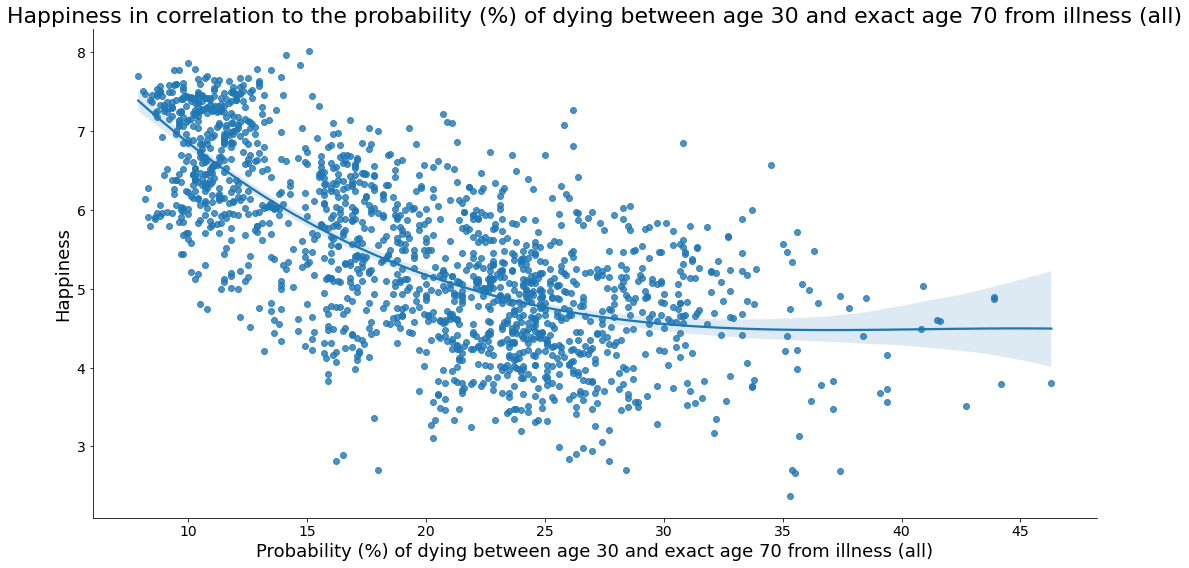

In [41]:
# Dying from illness and correlation to happiness 
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_death_causes_combined, x="Probability (%) of dying between age 30 and exact age 70 from illness (all)", y="happiness_score", order=3)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('Probability (%) of dying between age 30 and exact age 70 from illness (all)')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the probability (%) of dying between age 30 and exact age 70 from illness (all)')
plt.show()

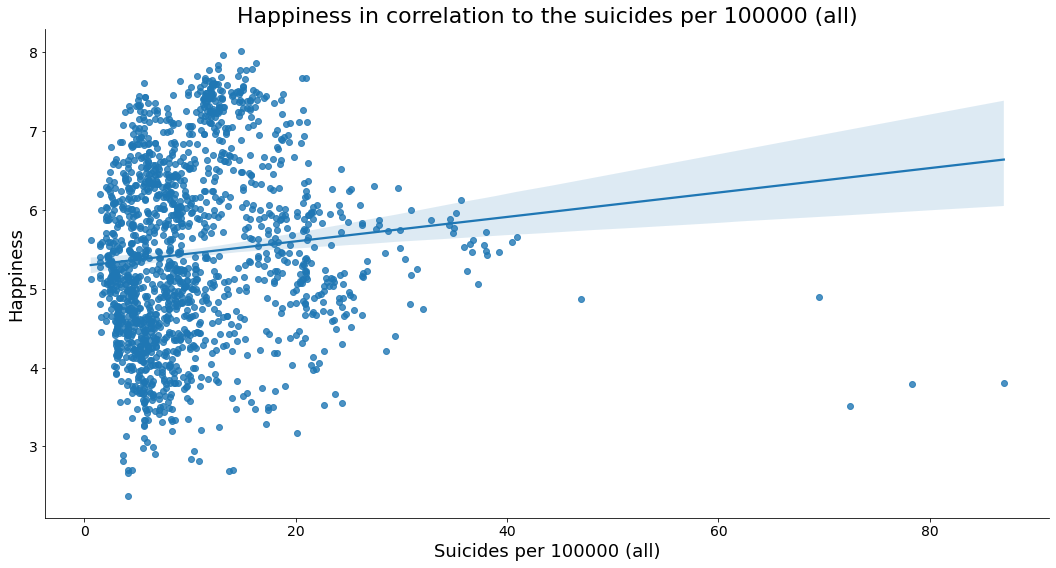

In [42]:
# Dying from suicide and correlation to happiness 
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_death_causes_combined, x="Suicides per 100000 (all)", y="happiness_score", order=1)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('Suicides per 100000 (all)')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the suicides per 100000 (all)')
plt.show()

### Internet users

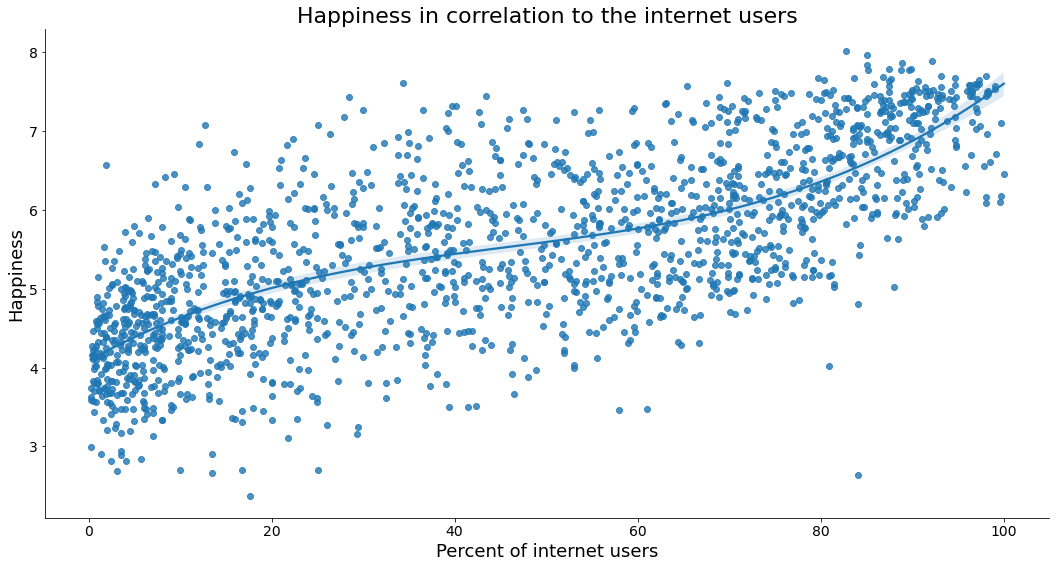

In [43]:
# Internet users
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_internet_users_combined, x="percent_internet_users", y="happiness_score", order=3)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('Percent of internet users')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the internet users')
plt.show()

### Population and country data

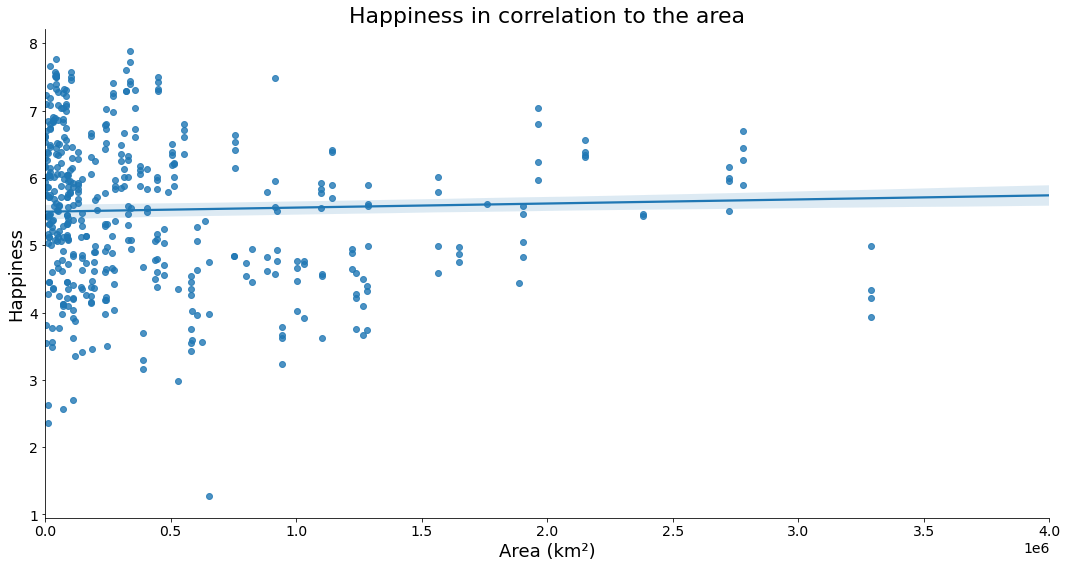

In [44]:
# Area
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_population_combined, x="Area (km²)", y="happiness_score", order=1)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, 4000000)

plt.xlabel('Area (km²)')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the area')
plt.show()

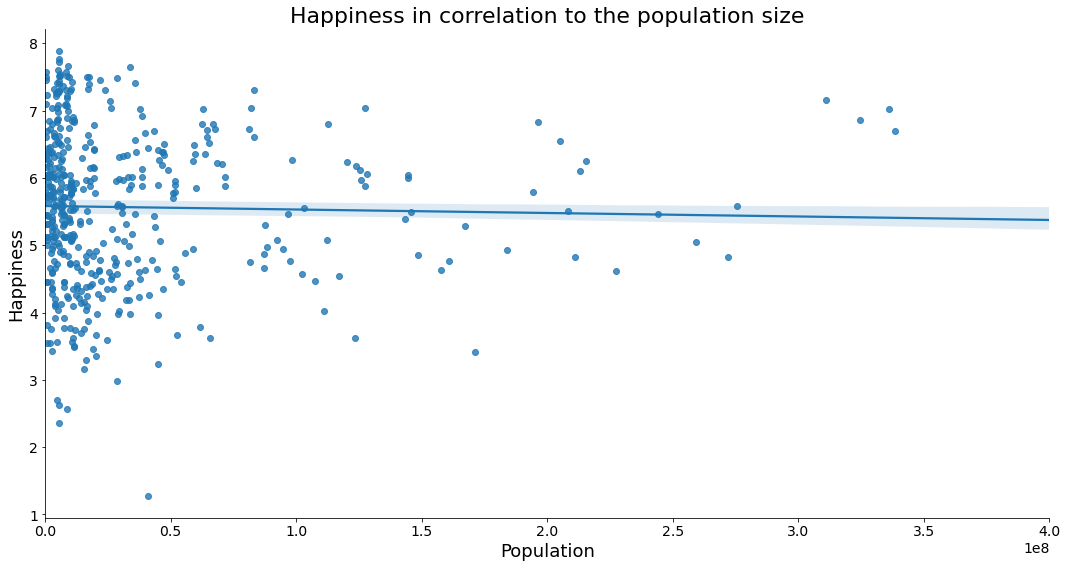

In [45]:
# Population
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_population_combined, x="population", y="happiness_score", order=1)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, 400000000)

plt.xlabel('Population')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the population size')
plt.show()

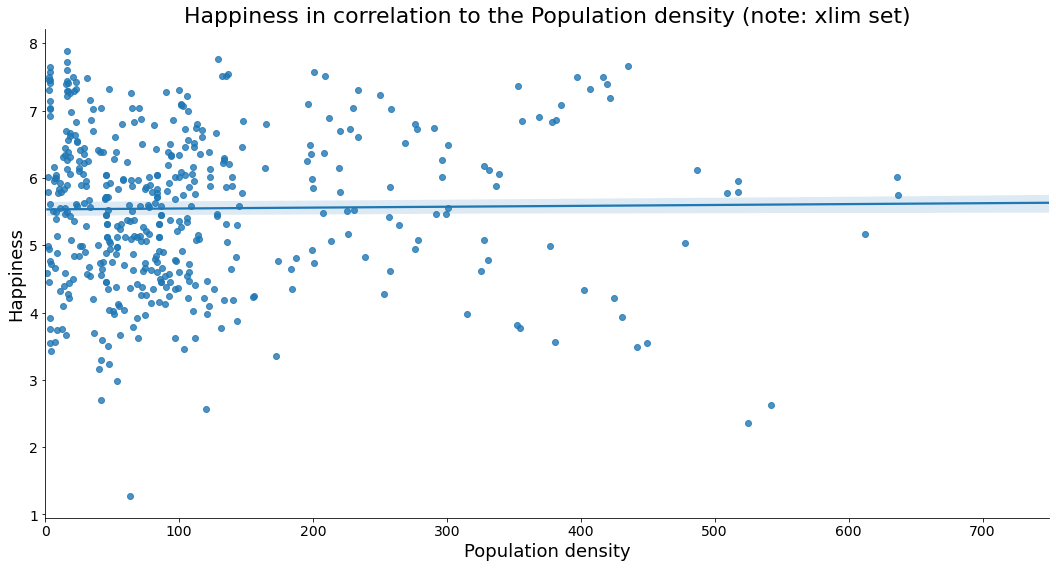

In [46]:
# Population density
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_population_combined, x="population density", y="happiness_score", order=1)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, 750)

plt.xlabel('Population density')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the Population density (note: xlim set)')
plt.show()

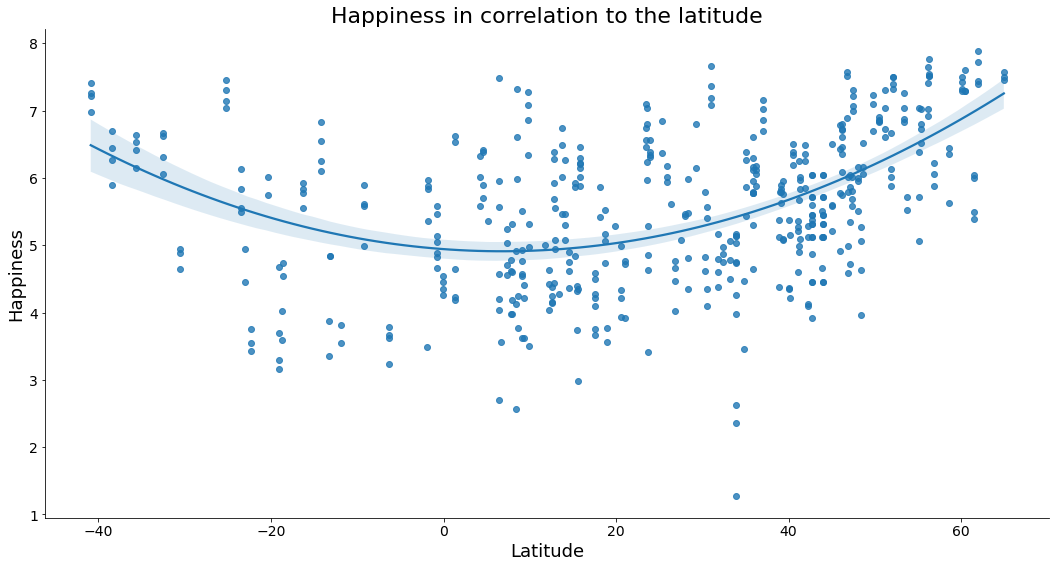

In [47]:
# Latitude
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_population_combined, x="latitude", y="happiness_score", order=2)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('Latitude')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the latitude')
plt.show()

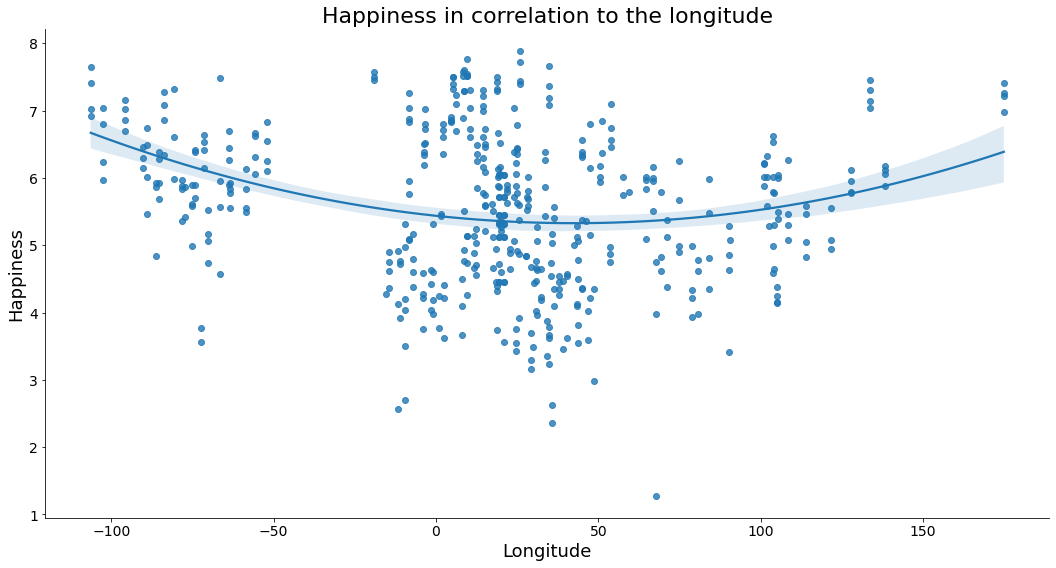

In [48]:
# Longitude
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_population_combined, x="longitude", y="happiness_score", order=2)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('Longitude')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the longitude')
plt.show()

### GDP data

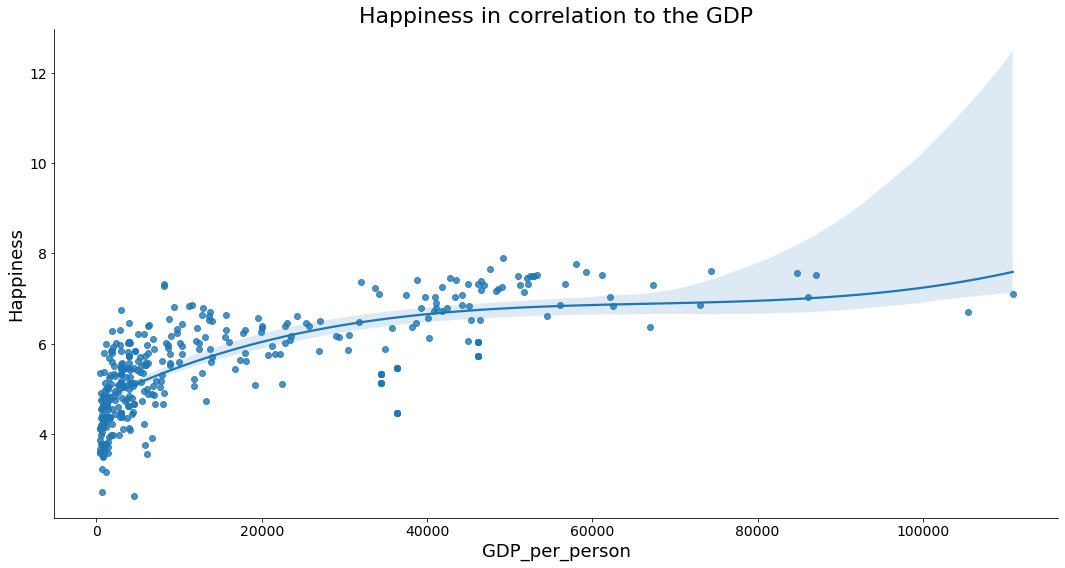

In [49]:
# GDP
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_gdp_combined, x="GDP_per_person", y="happiness_score", order=3)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_xlim(0, 50000000000)

plt.xlabel('GDP_per_person')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the GDP')
plt.show()

In [50]:
df_gdp_combined

# Sort the dataframe by 'country' and 'year' columns in ascending order
df_gdp_combined.sort_values(by='GDP_per_person', ascending= False)

,country,year,gdp,happiness_score,population,GDP_per_person
176,Luxembourg,2010,56213985987.00,7.10,507070,110860.00
177,Luxembourg,2015,60071584216.00,6.70,569408,105498.00
327,Switzerland,2020,752248045730.00,7.51,8638613,87080.00
143,Ireland,2020,425888950992.00,7.03,4946119,86106.00
326,Switzerland,2015,702149580771.00,7.57,8281732,84783.00
...,...,...,...,...,...,...
60,Central African Republic,2010,2142591376.00,3.57,4660067,460.00
178,Madagascar,2015,11323020829.00,3.59,24850912,456.00
305,Sierra Leone,2010,2578026297.00,4.13,6436698,401.00
312,Somalia,2015,5331761394.00,5.35,13763906,387.00


Text(0, 0.5, 'score')

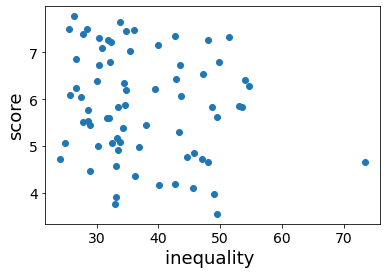

In [51]:
plt.figure()
plt.scatter(df_inequality_combined[df_inequality_combined.year == 2010]['gini_reported'], df_inequality_combined[df_inequality_combined.year == 2010]['happiness_score'])
plt.xlabel('inequality ')
plt.ylabel('score')

In [52]:

# low correlation
for df in new_dataframes:
    print(df.corr()['happiness_score'].sort_values())
    

Probability (%) of dying between age 30 and exact age 70 from illness (female)   -0.70
Probability (%) of dying between age 30 and exact age 70 from illness (all)      -0.67
Probability (%) of dying between age 30 and exact age 70 from illness (male)     -0.56
year                                                                              0.02
Suicides per 100000 (female)                                                      0.08
Suicides per 100000 (male)                                                        0.10
Suicides per 100000 (all)                                                         0.10
happiness_score                                                                   1.00
Name: happiness_score, dtype: float64
year                     0.05
percent_internet_users   0.72
happiness_score          1.00
Name: happiness_score, dtype: float64
longitude            -0.16
population           -0.08
population density    0.06
year                  0.07
Area (km²)            0.13
lat

In [53]:
"""for df in new_dataframes:

  print("Original:")
  print(df.corr()['happiness_score'].sort_values())

  df_trans = df.copy()

  for col in df_trans.select_dtypes(include=['number']).columns:
    if col != 'happiness_score':
      df_trans[col + '_log'] = np.log(df_trans[col])
      df_trans[col + '_sq'] = df_trans[col]**2

  print("Transformed:")
  print(df_trans.corr()['happiness_score'].sort_values())

  print()"""

# von Wilma erklären lassen

'for df in new_dataframes:\n\n  print("Original:")\n  print(df.corr()[\'happiness_score\'].sort_values())\n\n  df_trans = df.copy()\n\n  for col in df_trans.select_dtypes(include=[\'number\']).columns:\n    if col != \'happiness_score\':\n      df_trans[col + \'_log\'] = np.log(df_trans[col])\n      df_trans[col + \'_sq\'] = df_trans[col]**2\n\n  print("Transformed:")\n  print(df_trans.corr()[\'happiness_score\'].sort_values())\n\n  print()'

### Inequality

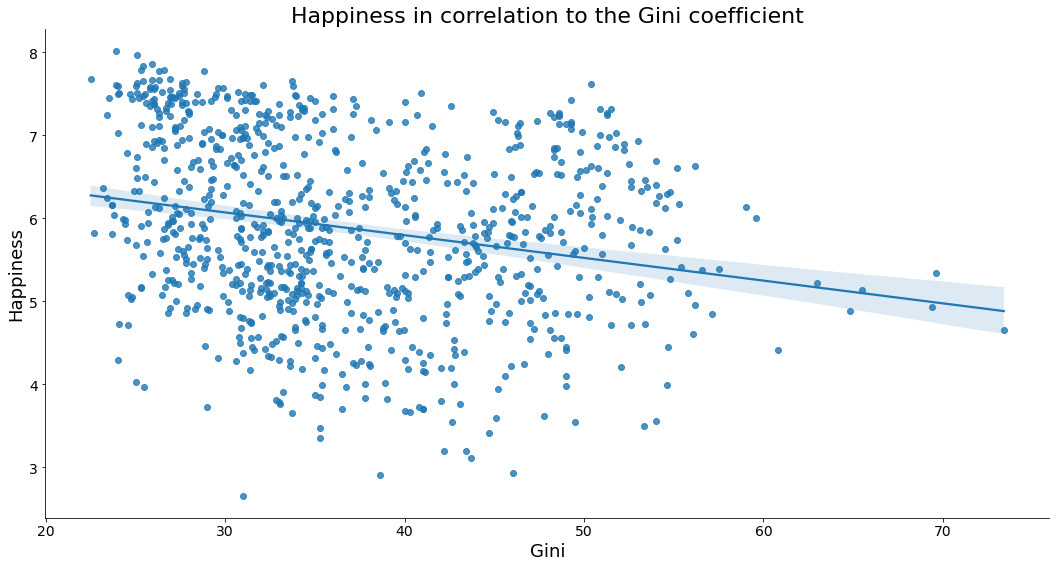

In [54]:
# Inequality
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_inequality_combined, x="gini_reported", y="happiness_score", order=1)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('Gini')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the Gini coefficient')
plt.show()

### Temperature change

In [55]:
df_environment_combined

,country,year,temperature_change,happiness_score
0,Afghanistan,2008,0.76,3.72
1,Afghanistan,2009,0.85,4.40
2,Afghanistan,2010,1.50,4.76
3,Afghanistan,2011,1.25,3.83
4,Afghanistan,2012,0.18,3.78
...,...,...,...,...
1610,Zimbabwe,2015,1.21,3.70
1611,Zimbabwe,2016,1.21,3.74
1612,Zimbabwe,2017,0.24,3.64
1613,Zimbabwe,2018,0.53,3.62


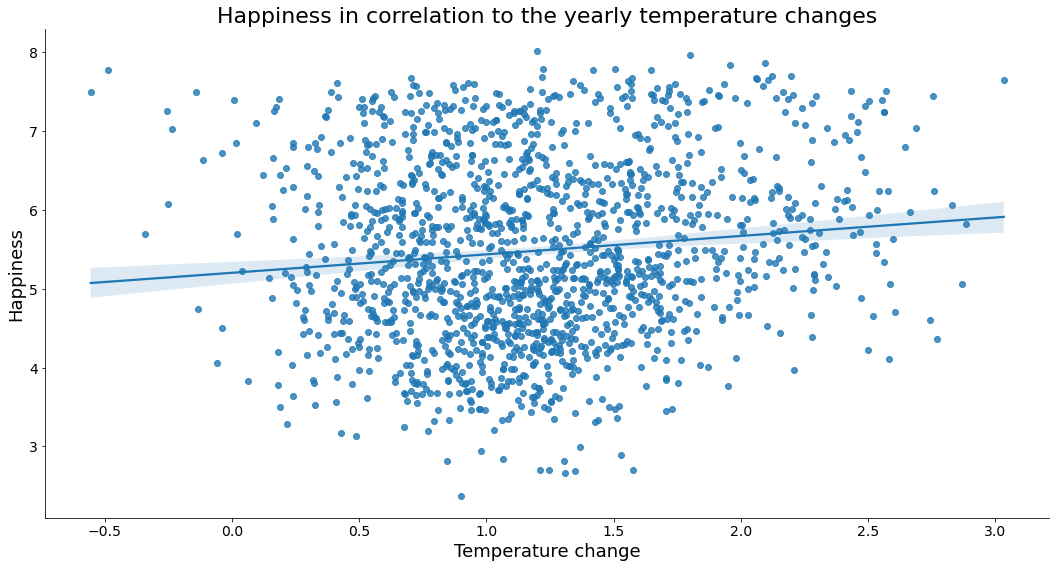

In [56]:
# Temperature developement
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_environment_combined, x="temperature_change", y="happiness_score", order=1)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('Temperature change')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the yearly temperature changes')
plt.show()

# Aggregate all datasets and determine main influence with ML

In [57]:
all_dataframes_combined.head()

,country,year,Probability (%) of dying between age 30 and exact age 70 from illness (all),Probability (%) of dying between age 30 and exact age 70 from illness (male),Probability (%) of dying between age 30 and exact age 70 from illness (female),Suicides per 100000 (all),Suicides per 100000 (male),Suicides per 100000 (female),happiness_score,percent_internet_users,Area (km²),population,population density,latitude,longitude,gdp,gini_reported,temperature_change
0,Argentina,2010,17.80,22.80,13.20,8.60,14.20,3.20,6.44,45.00,2780400,41100123,14.78,-38.42,-63.62,423627422092.00,42.91,0.12
1,Argentina,2015,16.50,20.80,12.50,8.30,13.60,3.30,6.70,68.04,2780400,43257065,15.56,-38.42,-63.62,594749285413.00,40.53,0.94
2,Armenia,2010,25.00,33.90,17.40,6.80,10.50,3.50,4.37,25.00,29743,2946293,99.06,40.07,45.04,9260284938.00,36.20,2.77
3,Armenia,2015,22.30,30.60,15.30,6.20,8.90,3.70,4.35,59.10,29743,2878595,96.78,40.07,45.04,10553337673.00,32.36,1.79
4,Australia,2010,9.90,12.10,7.60,11.70,17.70,5.70,7.45,76.00,7692024,22019168,2.86,-25.27,133.78,1147589183476.00,34.70,0.56


In [58]:
all_dataframes_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 18 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   country                                                                         149 non-null    object 
 1   year                                                                            149 non-null    int64  
 2   Probability (%) of dying between age 30 and exact age 70 from illness (all)     149 non-null    float64
 3   Probability (%) of dying between age 30 and exact age 70 from illness (male)    149 non-null    float64
 4   Probability (%) of dying between age 30 and exact age 70 from illness (female)  149 non-null    float64
 5   Suicides per 100000 (all)                                                       149 non-null    float64
 6   Suicides per 10000

In [59]:
numerical_df = all_dataframes_combined.select_dtypes(include=[np.number])
numerical_df.dropna(inplace=True)
numerical_df

,year,Probability (%) of dying between age 30 and exact age 70 from illness (all),Probability (%) of dying between age 30 and exact age 70 from illness (male),Probability (%) of dying between age 30 and exact age 70 from illness (female),Suicides per 100000 (all),Suicides per 100000 (male),Suicides per 100000 (female),happiness_score,percent_internet_users,Area (km²),population,population density,latitude,longitude,gdp,gini_reported,temperature_change
0,2010,17.80,22.80,13.20,8.60,14.20,3.20,6.44,45.00,2780400,41100123,14.78,-38.42,-63.62,423627422092.00,42.91,0.12
1,2015,16.50,20.80,12.50,8.30,13.60,3.30,6.70,68.04,2780400,43257065,15.56,-38.42,-63.62,594749285413.00,40.53,0.94
2,2010,25.00,33.90,17.40,6.80,10.50,3.50,4.37,25.00,29743,2946293,99.06,40.07,45.04,9260284938.00,36.20,2.77
3,2015,22.30,30.60,15.30,6.20,8.90,3.70,4.35,59.10,29743,2878595,96.78,40.07,45.04,10553337673.00,32.36,1.79
4,2010,9.90,12.10,7.60,11.70,17.70,5.70,7.45,76.00,7692024,22019168,2.86,-25.27,133.78,1147589183476.00,34.70,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2010,29.70,41.40,19.90,24.50,44.00,7.70,5.06,23.30,603500,45683020,75.70,48.38,31.17,141209864408.00,24.82,1.62
145,2015,26.20,37.50,16.80,21.60,38.90,6.70,3.96,48.88,603500,44982564,74.54,48.38,31.17,91030959455.00,25.46,2.21
146,2010,17.60,23.40,12.40,16.00,25.40,7.20,6.06,46.40,181034,3352651,18.52,-32.52,-55.77,40284481652.00,43.70,0.34
147,2015,17.10,21.80,12.90,18.60,30.40,7.70,6.63,64.57,181034,3402818,18.80,-32.52,-55.77,53274304222.00,40.20,1.03


Mean happiness: 5.76
MSE: 0.19
RMSE: 0.43
Relative RMSE: 7.47 %
R²-Score 0.851


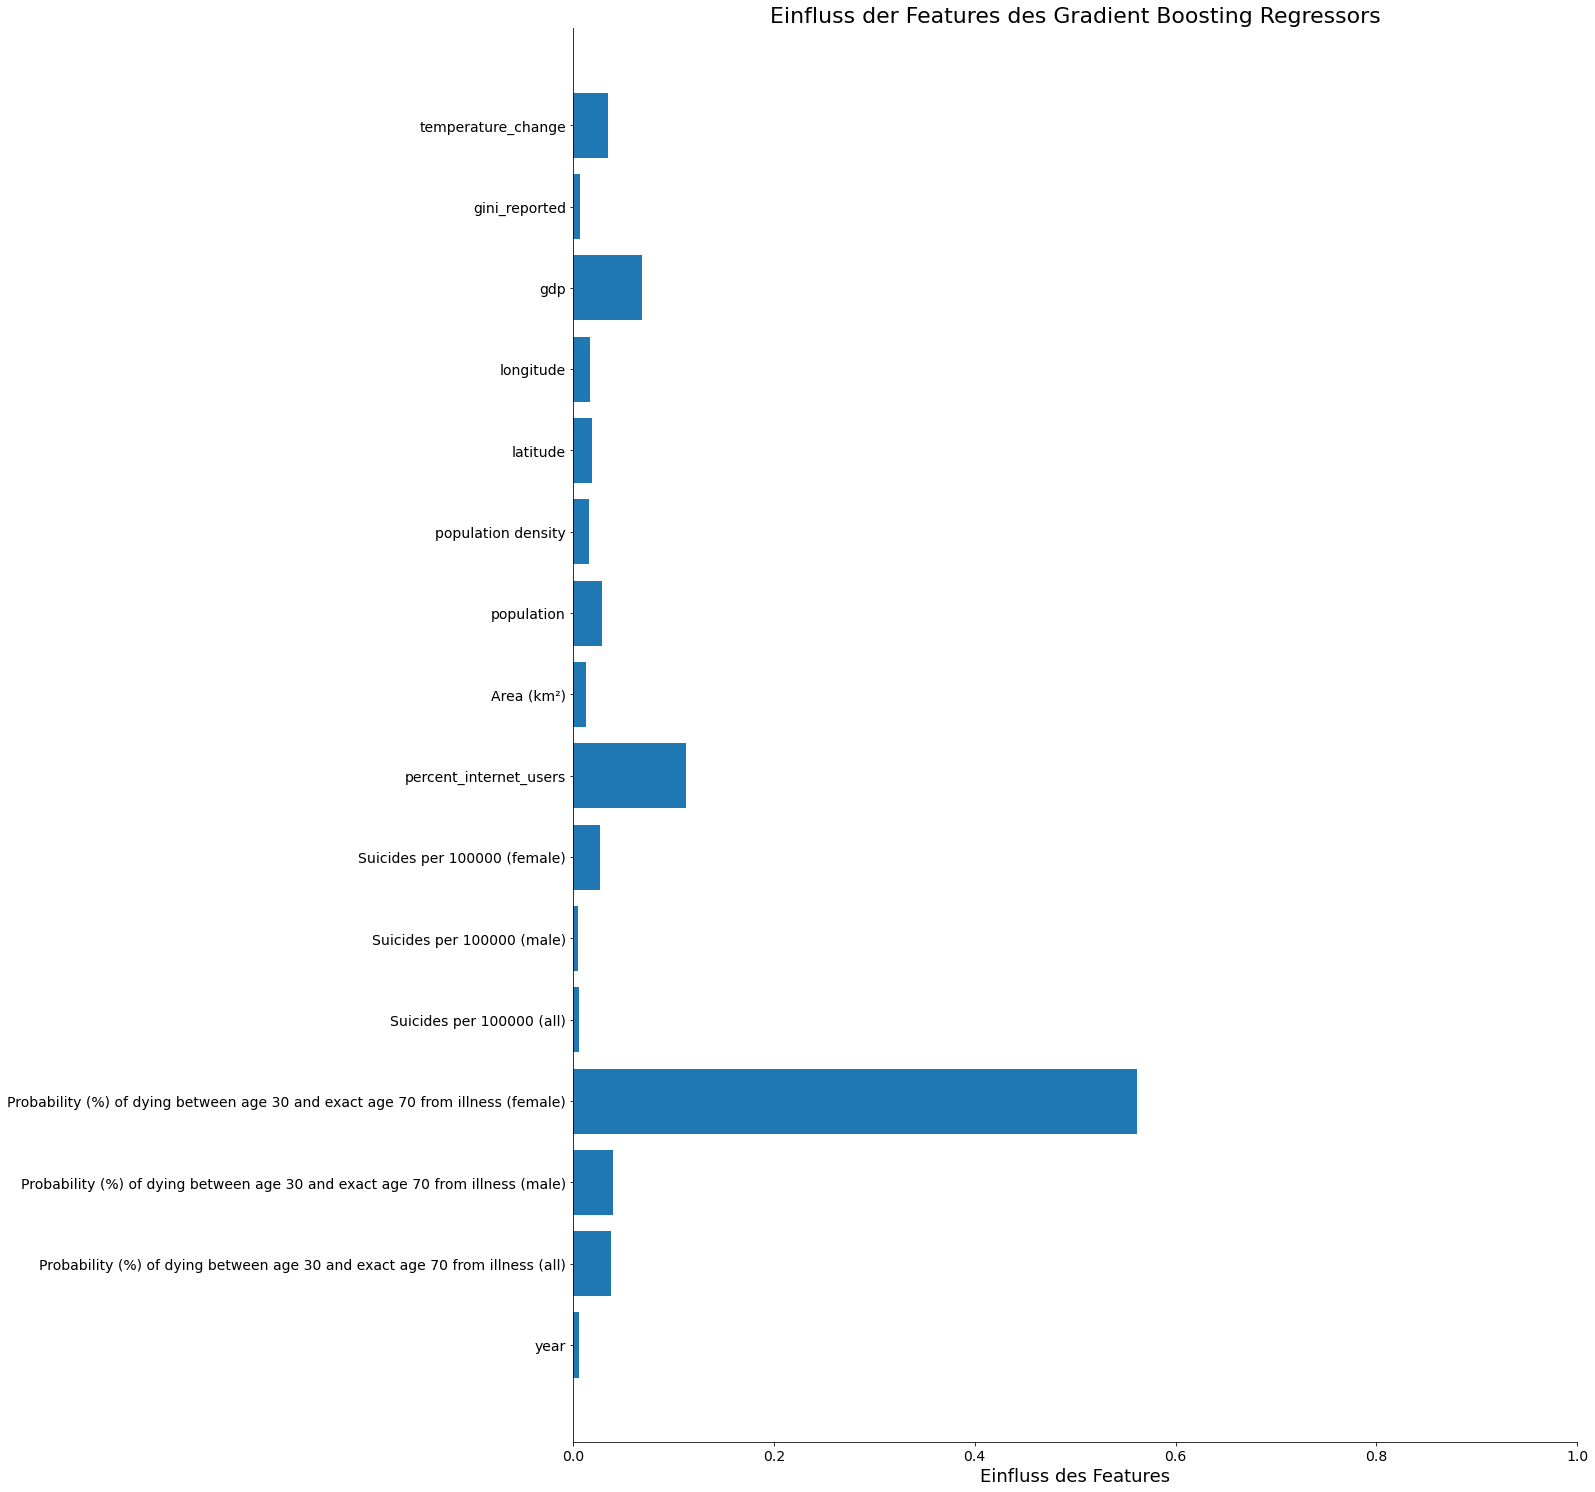

In [60]:
# ML
x = numerical_df.drop('happiness_score', axis=1)
y = numerical_df[['happiness_score']]
y = np.ravel(y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.20, random_state=42)

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor

ML_GradientBoostingRegressor = GradientBoostingRegressor(max_depth=5, n_estimators=150, random_state=42)
ML_GradientBoostingRegressor.fit(x_train, y_train)

y_pred=ML_GradientBoostingRegressor.predict(x_test)

print("Mean happiness:", round(numerical_df['happiness_score'].mean(), 2))
print("MSE:",round(mean_squared_error(y_test, y_pred),2))
print("RMSE:",round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
print("Relative RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)) / np.mean(numerical_df['happiness_score']) * 100, 2), "%")
print("R²-Score",round(ML_GradientBoostingRegressor.score(x_test,y_test),3))

feature_names = x.columns.tolist()

plt.figure(figsize=(18, 26))
plt.barh(range(len(ML_GradientBoostingRegressor.feature_importances_)), ML_GradientBoostingRegressor.feature_importances_)
plt.yticks(range(len(ML_GradientBoostingRegressor.feature_importances_)), feature_names) 
plt.xlim(0,1)
plt.xlabel("Einfluss des Features")

plt.gca().spines['right'].set_visible(False)  # Entfernen des rechten Rahmens
plt.gca().spines['top'].set_visible(False)  # Entfernen des oberen Rahmens

plt.title('Einfluss der Features des Gradient Boosting Regressors')
plt.show()

# Visualizations